# **Assignment 2 : Hierarchical Normal Model & Gibbs Sampling Project**

## **Problem Statement:**
We have been provided with the result of a survey conducted by The Economist and YouGov which contains details about US public's opinion on military aid to Ukraine. The data is segmented into 3 political affiliation - Democrats, Independents and Republicans. The survey data represents values in terms of support to different opionions divided into four distinct options: Increase Aid, Maintain Aid, Not Sure, and Decrease Aid. The survey data encompasses 1,603 adults, and the models aim to address the following key questions:

1. The Posterior Distribution of the Mean Support for Each Political Affiliation Across the Four Aid Options

2. The Predictive Distribution for a Hypothetical Additional Political Affiliation.

3. The Posterior of the Mean Support for the Hypothetical Political Affiliation.

We need to apply three Gaussian models - separate, pooled, and hierarchical and present our finding for the above questions.

**Report Layout**

The report is divided into below sections:
1. Introduction

2. Understanding of 3 Gaussian Models - separate, pooled and hierarchical

3. Part 1: The Posterior Distribution of the Mean Support for Each Political Affiliation Across the Four Aid Options

4. Part 2: The Predictive Distribution for a Hypothetical Additional Political Affiliation.

5. Part 3: The Posterior of the Mean Support for the Hypothetical Political Affiliation.

6. Summary

7. Model Conclusion

8. References


## **1. Introduction**
In recent years, the topic of military aid to Ukraine has been a central issue in political discussions across the United States. Public opinion on this matter varies significantly across different political affiliations, and understanding these variations is crucial for informed decision-making. The Economist and YouGov conducted a comprehensive survey to gauge Americans’ support for military aid to Ukraine, focusing on three major political groups: Democrats, Independents, and Republicans. The survey, which included responses from 1,603 adults, presents a valuable snapshot of the nation’s opinion on this issue.

This report aims to analyze the survey data using three different statistical models—separate, pooled, and hierarchical Gaussian models—to explore the variation in public opinion and to predict the views of a hypothetical additional political affiliation, namely Moderates. By examining the posterior distributions and predictive distributions, we seek to answer three key questions:

* What is the posterior distribution of the mean support for each political affiliation across the four aid options (Increase Aid, Maintain Aid, Not Sure, Decrease Aid)?

* What is the predictive distribution for the hypothetical new political affiliation (Moderates)?

* What is the posterior of the mean support for the hypothetical political affiliation (Moderates) across these aid opinions?

Through these analyses, the report will provide insights into how different political groups perceive the issue of military aid to Ukraine and estimate the likely stance of the Moderates. The findings will help policymakers and stakeholders better understand the public's diverse views and anticipate future trends in support for Ukraine aid.

## **2. Understanding of 3 Gaussian Models - separate, pooled and hierarchical**

Gaussian Distribution is also known as normal distribution with bell shaped curve, is a fundamental concept in statistics as it can be used to describe and classify features. This distribution is defined by two parameters - mean and standard deviation. The mean value represent central or average value around which the data is centered and standard deviation measures the variability in data which is the spread of the distribution.

Studying of Gaussian models is important as they provide powerful and versatile framework for analyzing data. In this project, we will be modelling data using below three models:

**A. Separate Model:**

A separate model is a model where each group is modelled independently of each other. Each group has its own mean and standard deviation and no information is shared between the groups. This model is important as we want to understand the behaviour of different groups without assuming any similarity between them. This is particularly important in survey research and public opinion analysis, where different demographic or political groups may hold sharply contrasting views.

**B. Pooled Model:**

A pooled model assumes the parameters or values of all the groups are drawn from a common distribution. This leads to common mean and standard deviation for all the groups. This model combines information from all the groups inorder to improve the precision of parameter estimation, especially for groups with small sample size. Pooled model helps us to understand overall trend across different groups.

**C. Hierarchical Model:**

Hierarchical models are nested models where observations are grouped into different levels. It is ideal in cases where samples in dataset form clusters or groups where their certain properties are shared.
Hierarchical models are crucial when analyzing data that is naturally grouped as they offer a flexible and powerful way to estimate both individual group effects and overall trends. Unlike separate models, which treat each group independently, or pooled models which assume all groups are the same, hierarchical models strike a balance by allowing for partial pooling.



As we have understood the three Gaussian models that we will used for comparison, let us understand what is bayes rule and why is it important here.

The posterior distribution calculation and predictive estimation of hypothetical group will be done using Bayes Modelling.
Bayes Model is a statistical framework as it tries to incorporate prior knowledge and data to make prediction and inferences. In simple words,Bayes Model is important as it tries to learn from data about the world around us. Hence we will be considering Bayesian analysis for our findings.

Before we try to analyse the survey data, we load the necessary packages and library in R

In [2]:
# Import libraries
install.packages("rstan")
library(rstan)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘abind’, ‘tensorA’, ‘distributional’, ‘checkmate’, ‘matrixStats’, ‘posterior’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘RcppParallel’, ‘loo’, ‘QuickJSR’, ‘RcppEigen’, ‘BH’


Loading required package: StanHeaders


rstan version 2.32.7 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr    

Loading data in R for further analysis.

In [3]:
#Load Data
data <- matrix(c(
  35, 39, 16, 10,
  19, 23, 26, 33,
  10, 24, 21, 45
), nrow = 3, byrow = TRUE)

rownames(data) <- c("Democrats", "Independents", "Republicans")
colnames(data) <- c("Increase", "Maintain", "NotSure", "Decrease")

aid_data <- as.data.frame(as.table(data)) %>%
  rename(Group = Var1, Opinion = Var2, Percent = Freq)

print(aid_data)

          Group  Opinion Percent
1     Democrats Increase      35
2  Independents Increase      19
3   Republicans Increase      10
4     Democrats Maintain      39
5  Independents Maintain      23
6   Republicans Maintain      24
7     Democrats  NotSure      16
8  Independents  NotSure      26
9   Republicans  NotSure      21
10    Democrats Decrease      10
11 Independents Decrease      33
12  Republicans Decrease      45


## 3. Part 1 : The posterior distribution of the mean support for each political affiliation (Democrats, Independents, Republicans) across the four aid opinions (Increase Aid, Maintain Aid, Not Sure, Decrease Aid).

In this analysis, we are trying to estimate the true mean level of support for each combination of:
*   Political group (Democrat, Independent, Republican)
*   Opinion about aid (Increase, Maintain, Not Sure, Decrease)

In simple words, we wanted to understand how much support different political groups in the U.S. (Democrats, Independents, and Republicans) have for different opinion about the U.S. military aid to Ukraine.

Instead of just reporting the exact percentages from the survey, we used Bayesian modeling to estimate the posterior distribution for support. This means we don't want to know “what’s the number in the survey?” — but want to know, “what is the full range of possible values the true average might be in the whole population?”

For each group and opinion, we used the data to build a distribution that tells us:

* what we think the most likely value is which is the peak of the distribution

* how uncertain we are about it which is the spread of the distribution.

We try to analyse this using 3 Gaussian Models - separate, pooled and hierarchical.

Below is the R code -






In [4]:
#Separate Model
separate_model_code <- "
data {
  int<lower=1> N;
  vector[N] y;
}
parameters {
  vector[N] theta;
  real<lower=0> sigma;
}
model {
  theta ~ normal(25, 20);  // weak prior
  y ~ normal(theta, sigma);
}
"

#Pooled Model
pooled_model_code <- "
data {
  int<lower=1> N;
  vector[N] y;
}
parameters {
  real theta;
  real<lower=0> sigma;
}
model {
  theta ~ normal(25, 20);
  y ~ normal(theta, sigma);
}
"
#Hierarchical Model
hierarchical_model_code <- "
data {
  int<lower=1> N;
  vector[N] y;
}
parameters {
  real mu;
  real<lower=0> tau;
  vector[N] theta;
  real<lower=0> sigma;
}
model {
  mu ~ normal(25, 20);
  tau ~ normal(0, 10);
  theta ~ normal(mu, tau);
  y ~ normal(theta, sigma);
}
"

In [5]:
# Common data
stan_data <- list(
  N = nrow(aid_data),
  y = aid_data$Percent
)

# Fit models
fit_separate <- stan(model_code = separate_model_code, data = stan_data, iter = 2000, chains = 4)
fit_pooled   <- stan(model_code = pooled_model_code, data = stan_data, iter = 2000, chains = 4)
fit_hier     <- stan(model_code = hierarchical_model_code, data = stan_data, iter = 2000, chains = 4)

# Extract summaries
summary_separate <- summary(fit_separate, pars = "theta")$summary
summary_pooled   <- summary(fit_pooled, pars = "theta")$summary
summary_hier     <- summary(fit_hier, pars = "theta")$summary


SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.076 seconds (Warm-up)
Chain 1:                0.121 seconds (Sampling)
Chain 1:                0.19

Warning message:
“There were 3 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.07, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.012 seconds (Warm-up)
Chain 1:                0.011 seconds (Sampling)
Chain 1:                0.023 

Warning message:
“There were 103 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


# A tibble: 36 × 7
    mean `2.5%` `97.5%` Model        Group        Opinion  Percent
 * <dbl>  <dbl>   <dbl> <chr>        <fct>        <fct>      <dbl>
 1  33.9 17.0      48.4 Separate     Democrats    Increase      35
 2  19.7  5.37     35.4 Separate     Independents Increase      19
 3  11.9 -1.45     30.3 Separate     Republicans  Increase      10
 4  37.4 19.7      50.3 Separate     Democrats    Maintain      39
 5  23.2  8.27     38.6 Separate     Independents Maintain      23
 6  24.1  8.72     40.1 Separate     Republicans  Maintain      24
 7  17.2  3.82     33.3 Separate     Democrats    NotSure       16
 8  25.9 10.8      40.3 Separate     Independents NotSure       26
 9  21.5  6.91     36.8 Separate     Republicans  NotSure       21
10  11.7 -0.629    28.6 Separate     Democrats    Decrease      10
11  31.9 15.2      45.7 Separate     Independents Decrease      33
12  42.6 24.3      55.6 Separate     Republicans  Decrease      45
13  25.1 18.1      32.2 Pooled       Democr

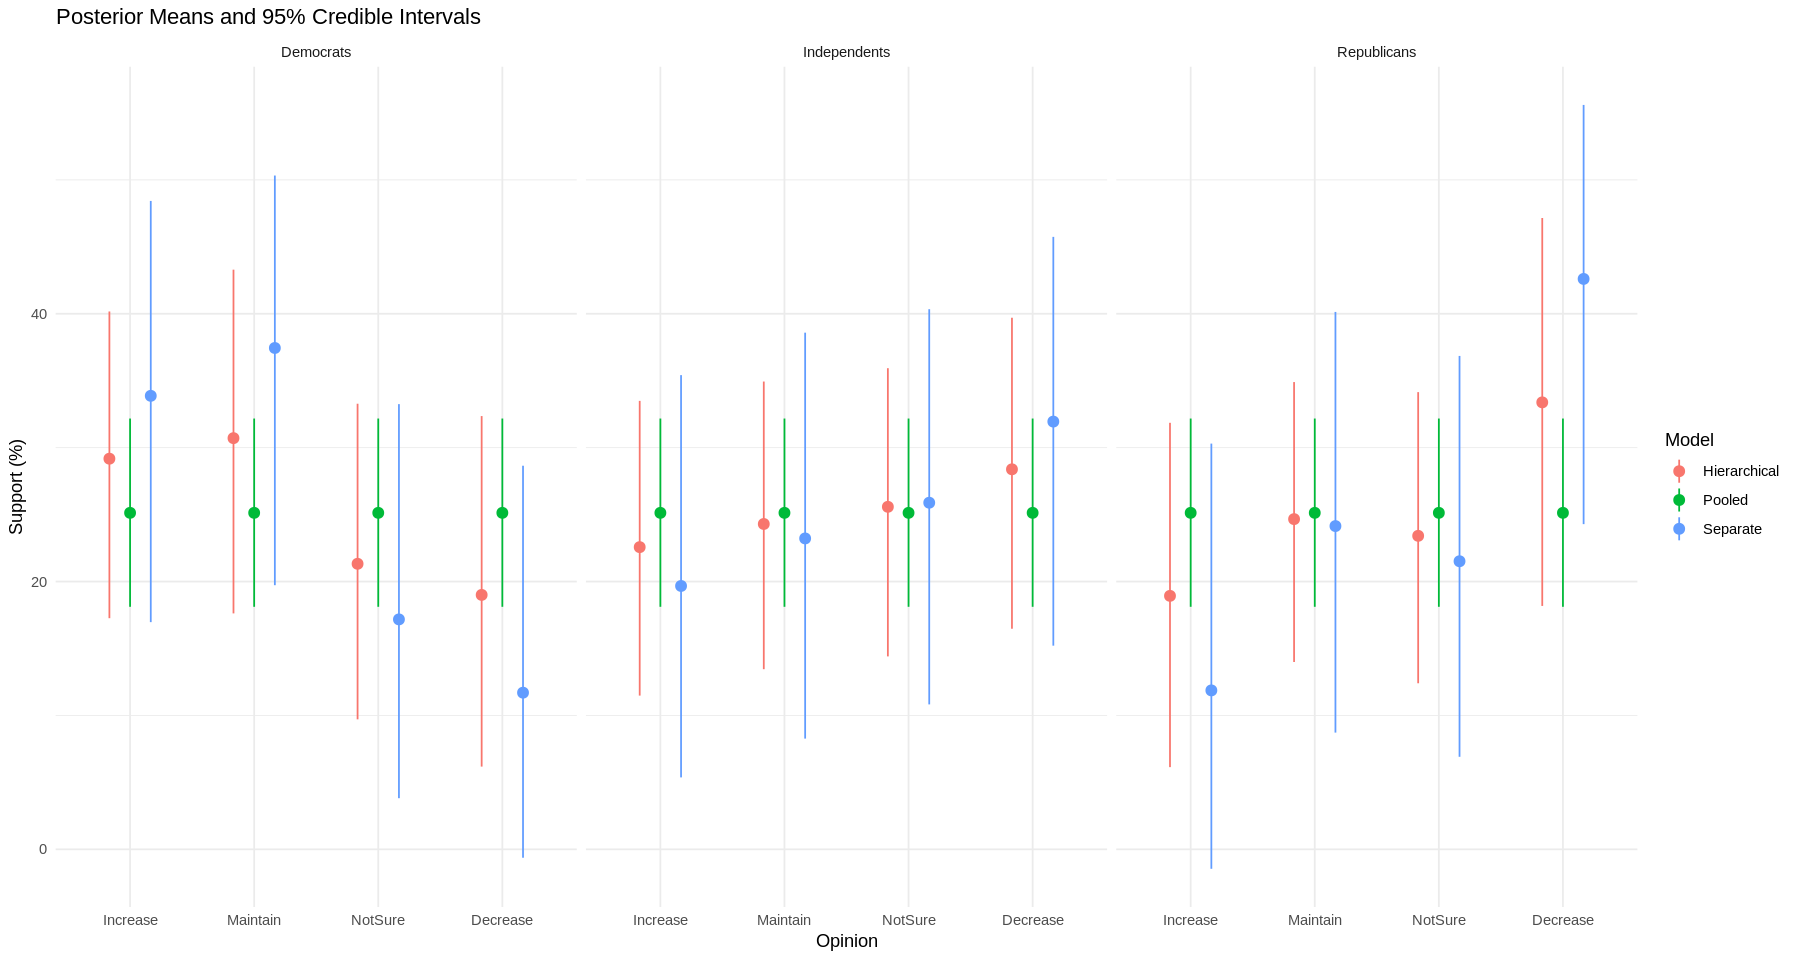

In [7]:
# Combine summaries
posterior_summary <- bind_rows(
  as_tibble(summary_separate)[, c("mean", "2.5%", "97.5%")] %>% mutate(Model = "Separate"),
  as_tibble(summary_pooled)[rep(1, 12), c("mean", "2.5%", "97.5%")] %>% mutate(Model = "Pooled"),
  as_tibble(summary_hier)[, c("mean", "2.5%", "97.5%")] %>% mutate(Model = "Hierarchical")
) %>%
  bind_cols(aid_data[rep(1:nrow(aid_data), times = 3), ])

print(posterior_summary,n=36)

# Plot
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(posterior_summary, aes(x = Opinion, y = mean, ymin = `2.5%`, ymax = `97.5%`, color = Model)) +
  geom_pointrange(position = position_dodge(width = 0.5)) +
  facet_wrap(~Group) +
  labs(title = "Posterior Means and 95% Credible Intervals", y = "Support (%)") +
  theme_minimal()



**Interpretation of Results:**

We examined how people from different political groups — Democrats, Independents, and Republicans — have their support across different opinion on aids (Increase, Maintain, Not Sure, Decrease). The above graph
provides us with a cummalative summary of results. Lets try to understand the results for different political group in support of different aids separately.

**1. Support for Increasing Aid:**


# A tibble: 9 × 7
   mean `2.5%` `97.5%` Model        Group        Opinion  Percent
  <dbl>  <dbl>   <dbl> <chr>        <fct>        <fct>      <dbl>
1  33.7  16.8     47.8 Separate     Democrats    Increase      35
2  19.6   5.87    34.7 Separate     Independents Increase      19
3  11.7  -1.49    28.7 Separate     Republicans  Increase      10
4  25.2  18.5     32.4 Pooled       Democrats    Increase      35
5  25.2  18.5     32.4 Pooled       Independents Increase      19
6  25.2  18.5     32.4 Pooled       Republicans  Increase      10
7  29.1  16.1     41.5 Hierarchical Democrats    Increase      35
8  22.2  11.1     34.6 Hierarchical Independents Increase      19
9  18.4   6.39    32.1 Hierarchical Republicans  Increase      10


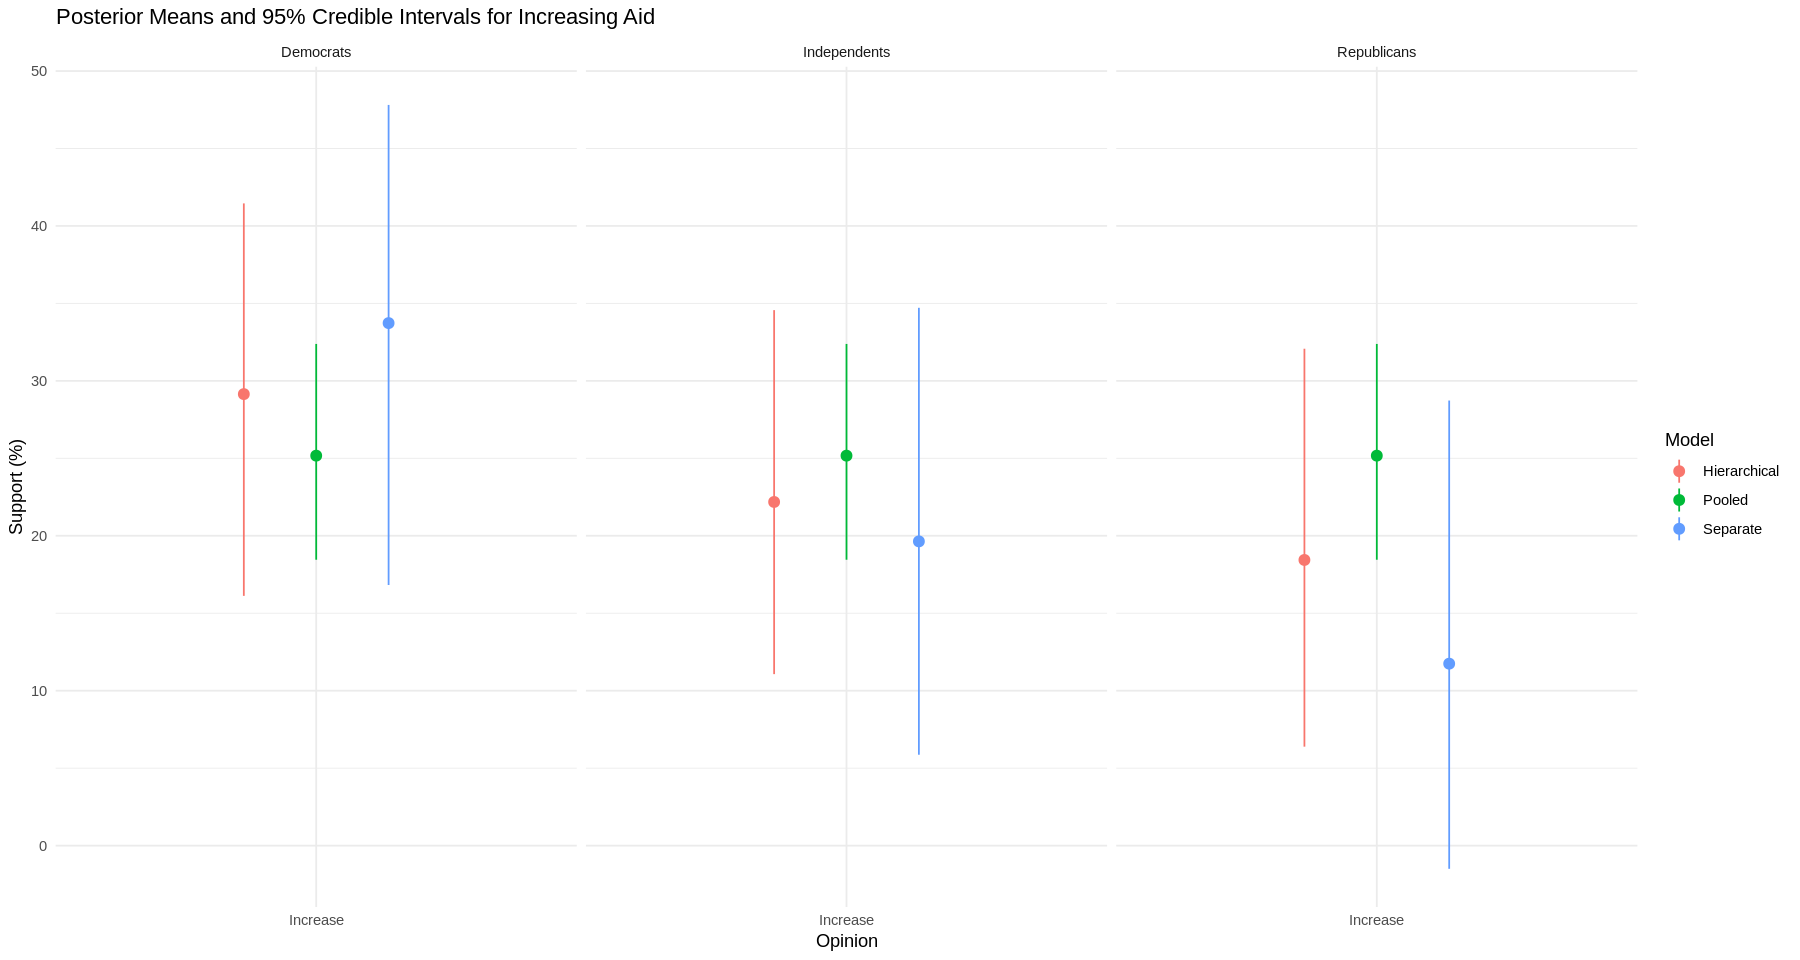

In [13]:
#Results for Increasing Aid
post_summary_inc<-posterior_summary[posterior_summary$Opinion=='Increase',]

print(post_summary_inc)

ggplot(post_summary_inc, aes(x = Opinion, y = mean, ymin = `2.5%`, ymax = `97.5%`, color = Model)) +
  geom_pointrange(position = position_dodge(width = 0.5)) +
  facet_wrap(~Group) +
  labs(title = "Posterior Means and 95% Credible Intervals for Increasing Aid", y = "Support (%)") +
  theme_minimal()

**Interpreting of Results for Increasing Aid:**

* Democrats are the most supportive of increasing aid, with about 1 in 3 saying they favor it. This aligns closely with the survey results.

* Independents show moderate support, with estimated support around 20–22% depending on the model.

* Republicans show the lowest support, with separate model estimating support of 11% and pooled and hierarchical model estimating 25% and 18% respectively.

**2. Support for Maintaining Aid:**

We also looked at how people from different political groups feel about maintaining current levels of aids to Ukraine.

# A tibble: 9 × 7
   mean `2.5%` `97.5%` Model        Group        Opinion  Percent
  <dbl>  <dbl>   <dbl> <chr>        <fct>        <fct>      <dbl>
1  37.4  19.4     50.8 Separate     Democrats    Maintain      39
2  23.3   8.70    38.1 Separate     Independents Maintain      23
3  24.1   9.60    38.9 Separate     Republicans  Maintain      24
4  25.2  18.5     32.4 Pooled       Democrats    Maintain      39
5  25.2  18.5     32.4 Pooled       Independents Maintain      23
6  25.2  18.5     32.4 Pooled       Republicans  Maintain      24
7  30.9  16.9     43.9 Hierarchical Democrats    Maintain      39
8  23.8  12.9     35.3 Hierarchical Independents Maintain      23
9  24.4  12.7     35.9 Hierarchical Republicans  Maintain      24


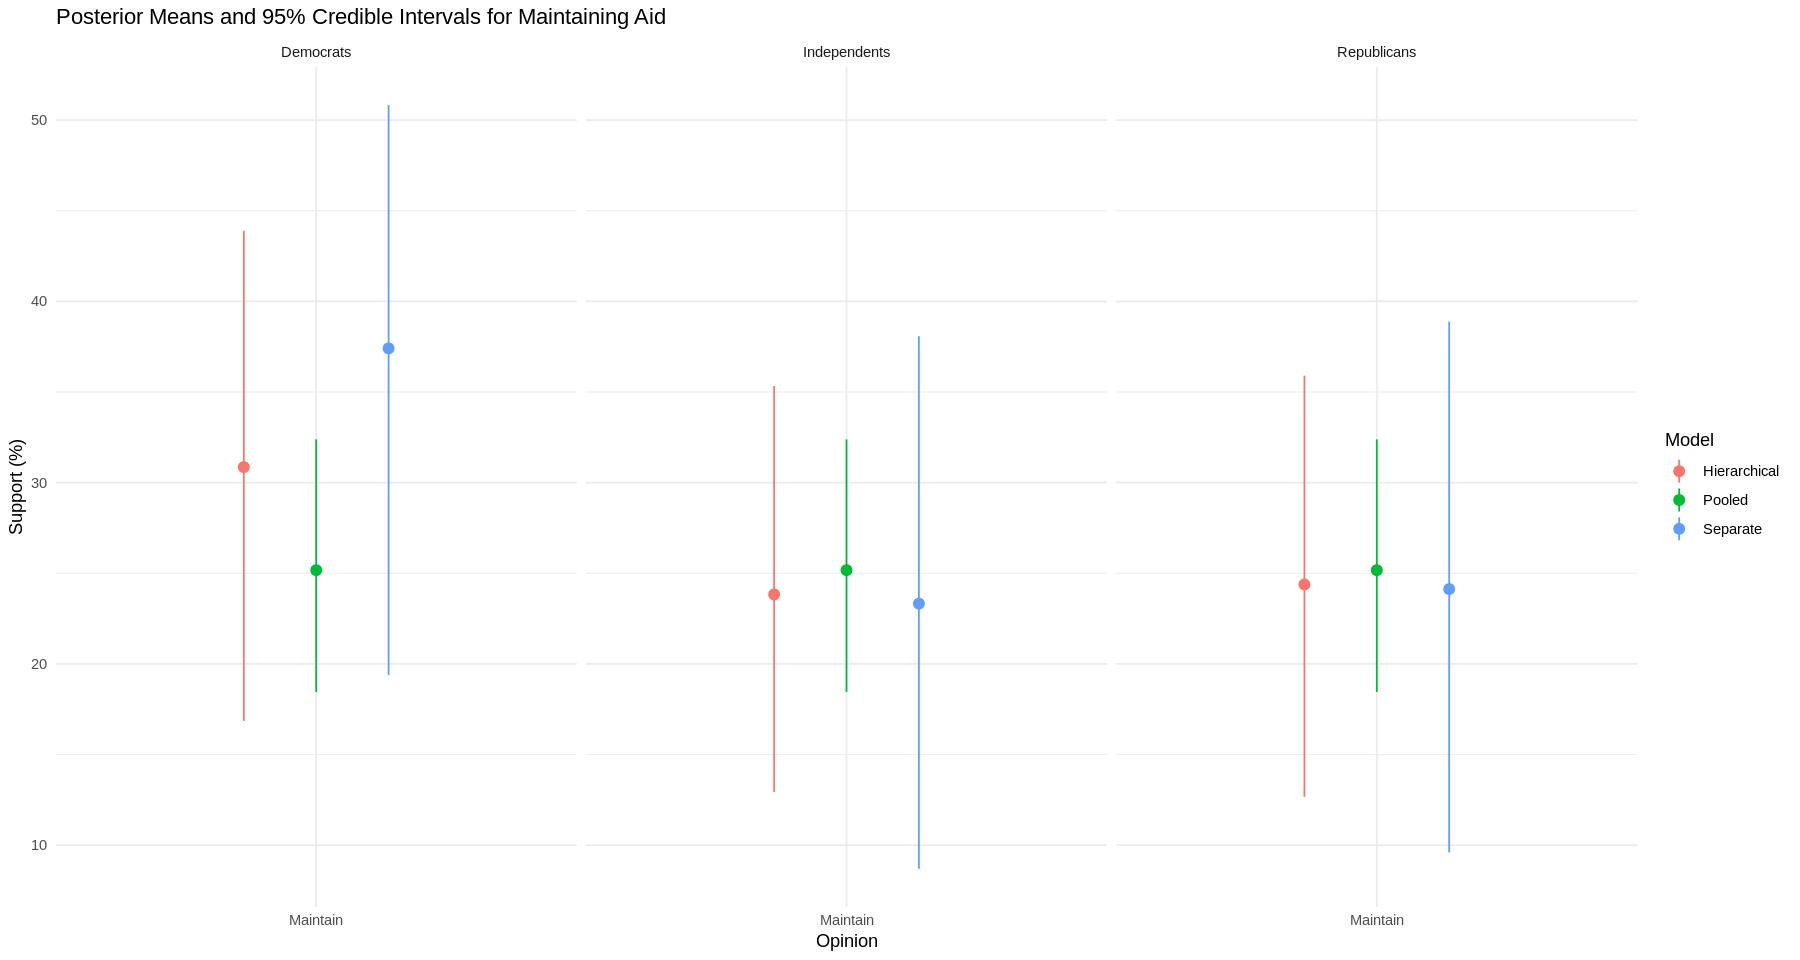

In [17]:
#Results for Maintain
post_summary_mnt<-posterior_summary[posterior_summary$Opinion=='Maintain',]

print(post_summary_mnt)

ggplot(post_summary_mnt, aes(x = Opinion, y = mean, ymin = `2.5%`, ymax = `97.5%`, color = Model)) +
  geom_pointrange(position = position_dodge(width = 0.5)) +
  facet_wrap(~Group) +
  labs(title = "Posterior Means and 95% Credible Intervals for Maintaining Aid", y = "Support (%)") +
  theme_minimal()

**Interpretation of Results for Maintaining Aid:**

* Democrats show the highest support for maintaining aid at its current level — about 37%, closely matching the survey result (39%). The hierarchical model softens this slightly to 31%, but still suggests strong support.

* Independents and Republicans are both estimated around 23–24%, with all three models in close agreement.

* As we can observe, the pooled model gives the same estimate for all groups (25.1%). This is because it is masking the real differences — which is why it's less useful when group differences are important.

**3. Support for Not Sure:**

Some respondents weren’t sure whether the U.S. should increase, decrease, or maintain foreign aid. Lets understand how different political parties support this view.


# A tibble: 9 × 7
   mean `2.5%` `97.5%` Model        Group        Opinion Percent
  <dbl>  <dbl>   <dbl> <chr>        <fct>        <fct>     <dbl>
1  17.1   3.52    33.9 Separate     Democrats    NotSure      16
2  25.8  10.6     41.7 Separate     Independents NotSure      26
3  21.4   7.89    36.6 Separate     Republicans  NotSure      21
4  25.2  18.5     32.4 Pooled       Democrats    NotSure      16
5  25.2  18.5     32.4 Pooled       Independents NotSure      26
6  25.2  18.5     32.4 Pooled       Republicans  NotSure      21
7  21.0   9.77    33.6 Hierarchical Democrats    NotSure      16
8  25.3  13.8     36.9 Hierarchical Independents NotSure      26
9  23.2  12.3     34.9 Hierarchical Republicans  NotSure      21


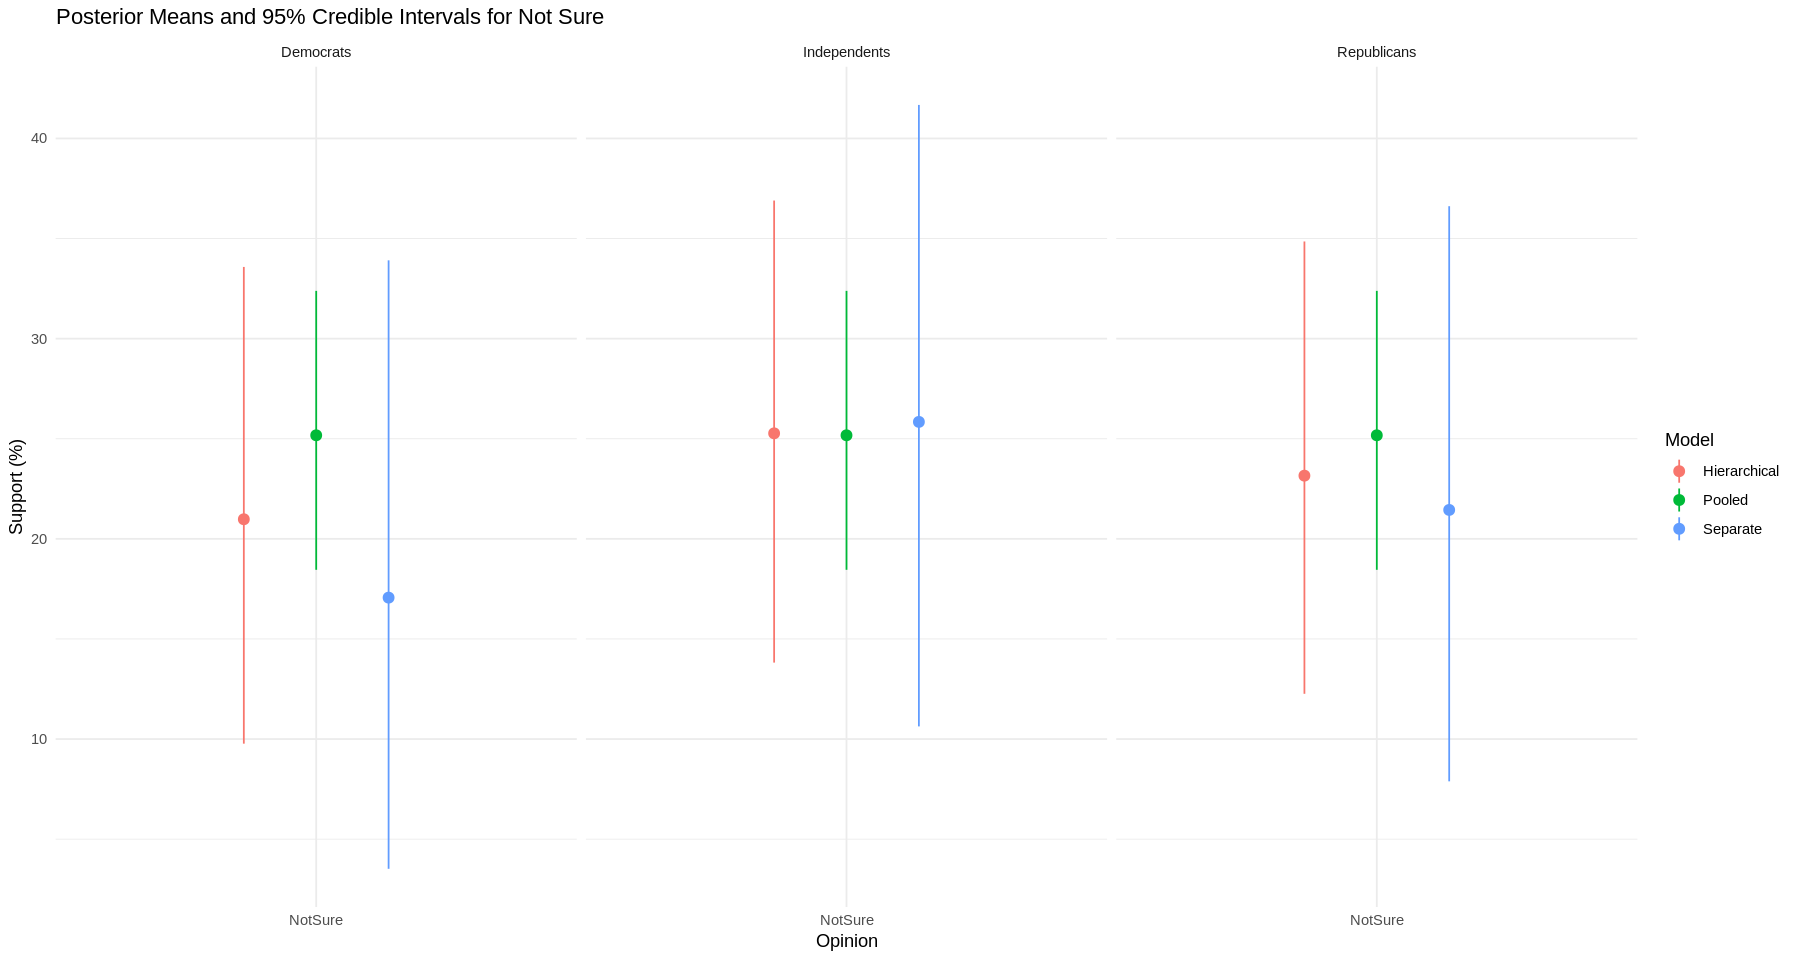

In [15]:
#Results for Not Sure
post_summary_ns<-posterior_summary[posterior_summary$Opinion=='NotSure',]

print(post_summary_ns)

ggplot(post_summary_ns, aes(x = Opinion, y = mean, ymin = `2.5%`, ymax = `97.5%`, color = Model)) +
  geom_pointrange(position = position_dodge(width = 0.5)) +
  facet_wrap(~Group) +
  labs(title = "Posterior Means and 95% Credible Intervals for Not Sure", y = "Support (%)") +
  theme_minimal()

**Interpretation of results for Not Sure:**

* Independents were the most likely to be unsure, with estimated “Not Sure” rates around 25–26% — nearly identical across all models and matching the survey.

* Republicans also showed a notable level of uncertainty at around 21–25%.

* Democrats were least likely to be unsure, with only about 17–21%.

**4. Support for Decreasing Aid:**

We looked at how many people think that the U.S. should decrease foreign aid.

# A tibble: 9 × 7
   mean `2.5%` `97.5%` Model        Group        Opinion  Percent
  <dbl>  <dbl>   <dbl> <chr>        <fct>        <fct>      <dbl>
1  11.7  -1.81    29.3 Separate     Democrats    Decrease      10
2  32.2  16.1     46.4 Separate     Independents Decrease      33
3  42.7  24.4     55.8 Separate     Republicans  Decrease      45
4  25.2  18.5     32.4 Pooled       Democrats    Decrease      10
5  25.2  18.5     32.4 Pooled       Independents Decrease      33
6  25.2  18.5     32.4 Pooled       Republicans  Decrease      45
7  18.3   5.09    32.3 Hierarchical Democrats    Decrease      10
8  28.4  16.4     40.6 Hierarchical Independents Decrease      33
9  33.3  17.7     48.1 Hierarchical Republicans  Decrease      45


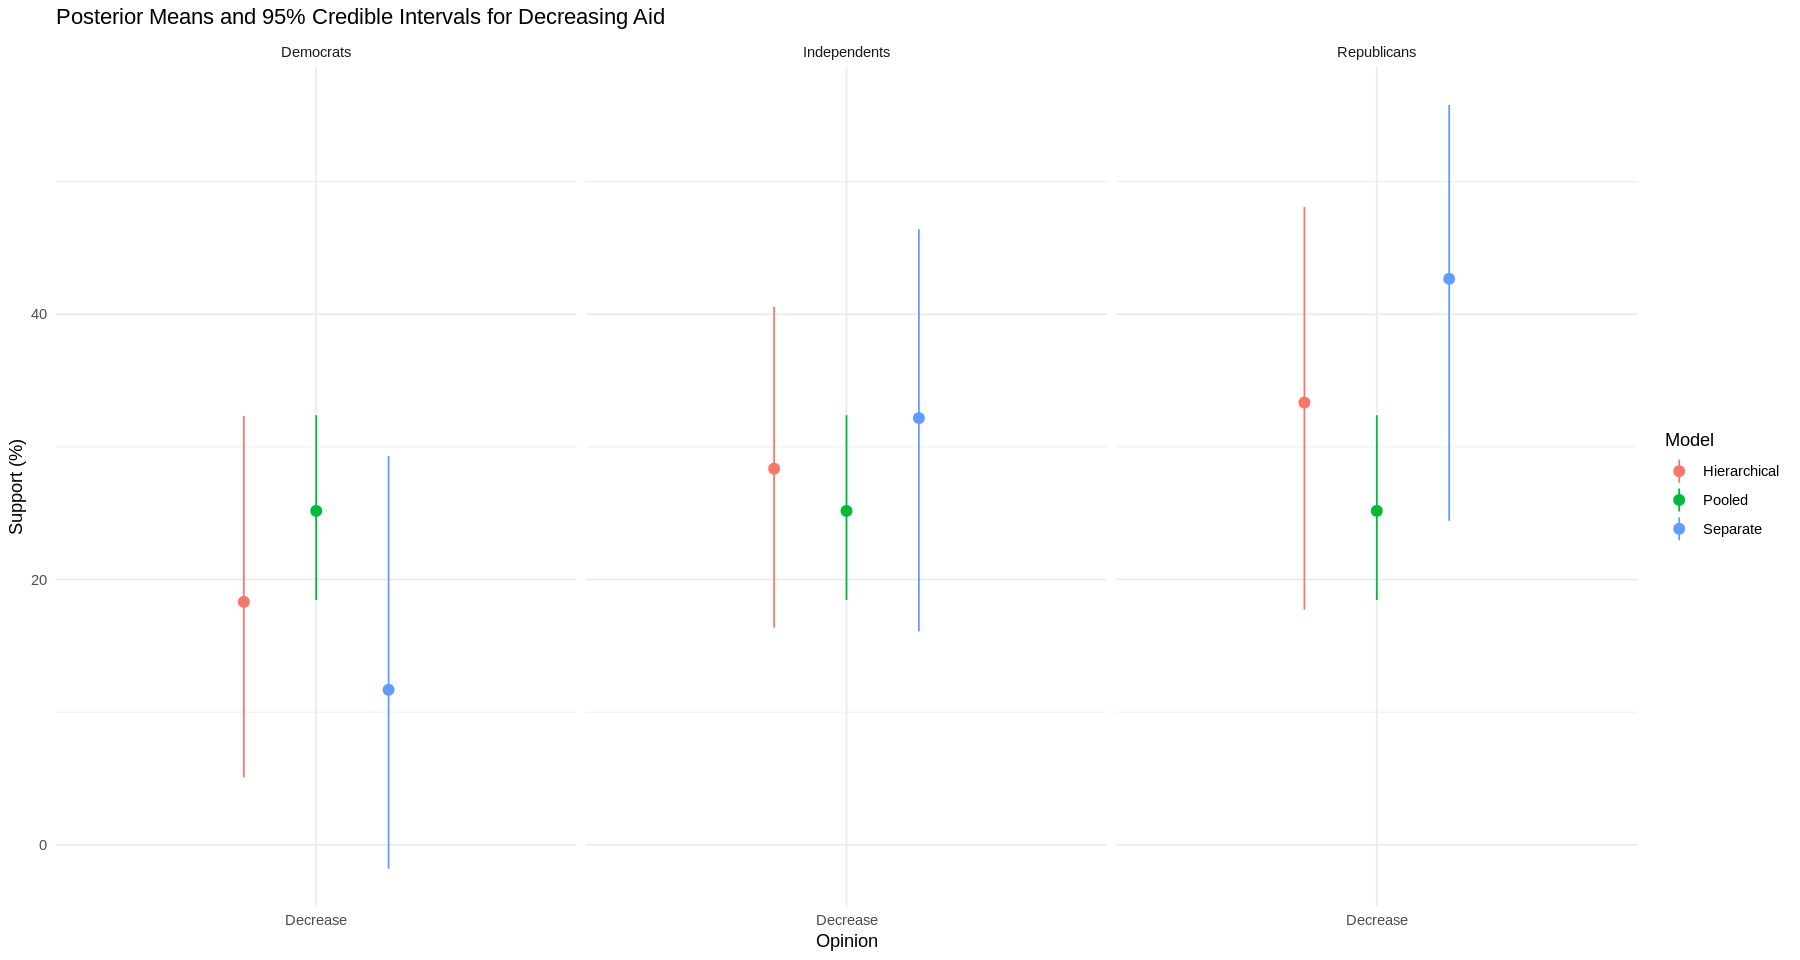

In [16]:
#Results for Decrease
post_summary_dc<-posterior_summary[posterior_summary$Opinion=='Decrease',]

print(post_summary_dc)

ggplot(post_summary_dc, aes(x = Opinion, y = mean, ymin = `2.5%`, ymax = `97.5%`, color = Model)) +
  geom_pointrange(position = position_dodge(width = 0.5)) +
  facet_wrap(~Group) +
  labs(title = "Posterior Means and 95% Credible Intervals for Decreasing Aid", y = "Support (%)") +
  theme_minimal()

  **Interpretation of Results for Decreasing Aid:**

* Republicans are the most supportive of decreasing aid — about 43% in the separate model, closely matching the actual survey (45%). Even the hierarchical model estimates a high 33%, well above other groups.

* Independents also show substantial support for cutting aid — around 25–32% depending on the model.

* Democrats, in contrast, show much less support for decreasing aid. The separate model estimates only 12%, with the credible interval including very low values, and this aligns with the actual survey (10%).

## 4. Part 2: The predictive distribution for a hypothetical additional political affiliation.

Predictive distribution means based on what we have learnt from the data, if there is a new or similar observation, what should we expect.

In this analysis, we are trying to predict what kind of response we should expect for a hypothetical political affiliation say 'Moderates' based on the existing data.

We used the data of existing political groups to estimate what support might look like in a new political group - 'Moderates' that we haven’t yet surveyed. Based on the existing data, we generated a predictive distribution that shows the range of likely support levels for this new group.

This helps us understand how this groups might respond to questions about Ukraine aid using the same patterns of variability seen in our current data.

The predictive distribution combines:

* What we’ve learned about the average support across all groups (μ),

* How different the groups tend to be from each other (τ),

* And how much random variation is in the data (σ).

Below is the R code -

Warning message:
“Removed 1944 rows containing non-finite outside the scale range
(`stat_density()`).”


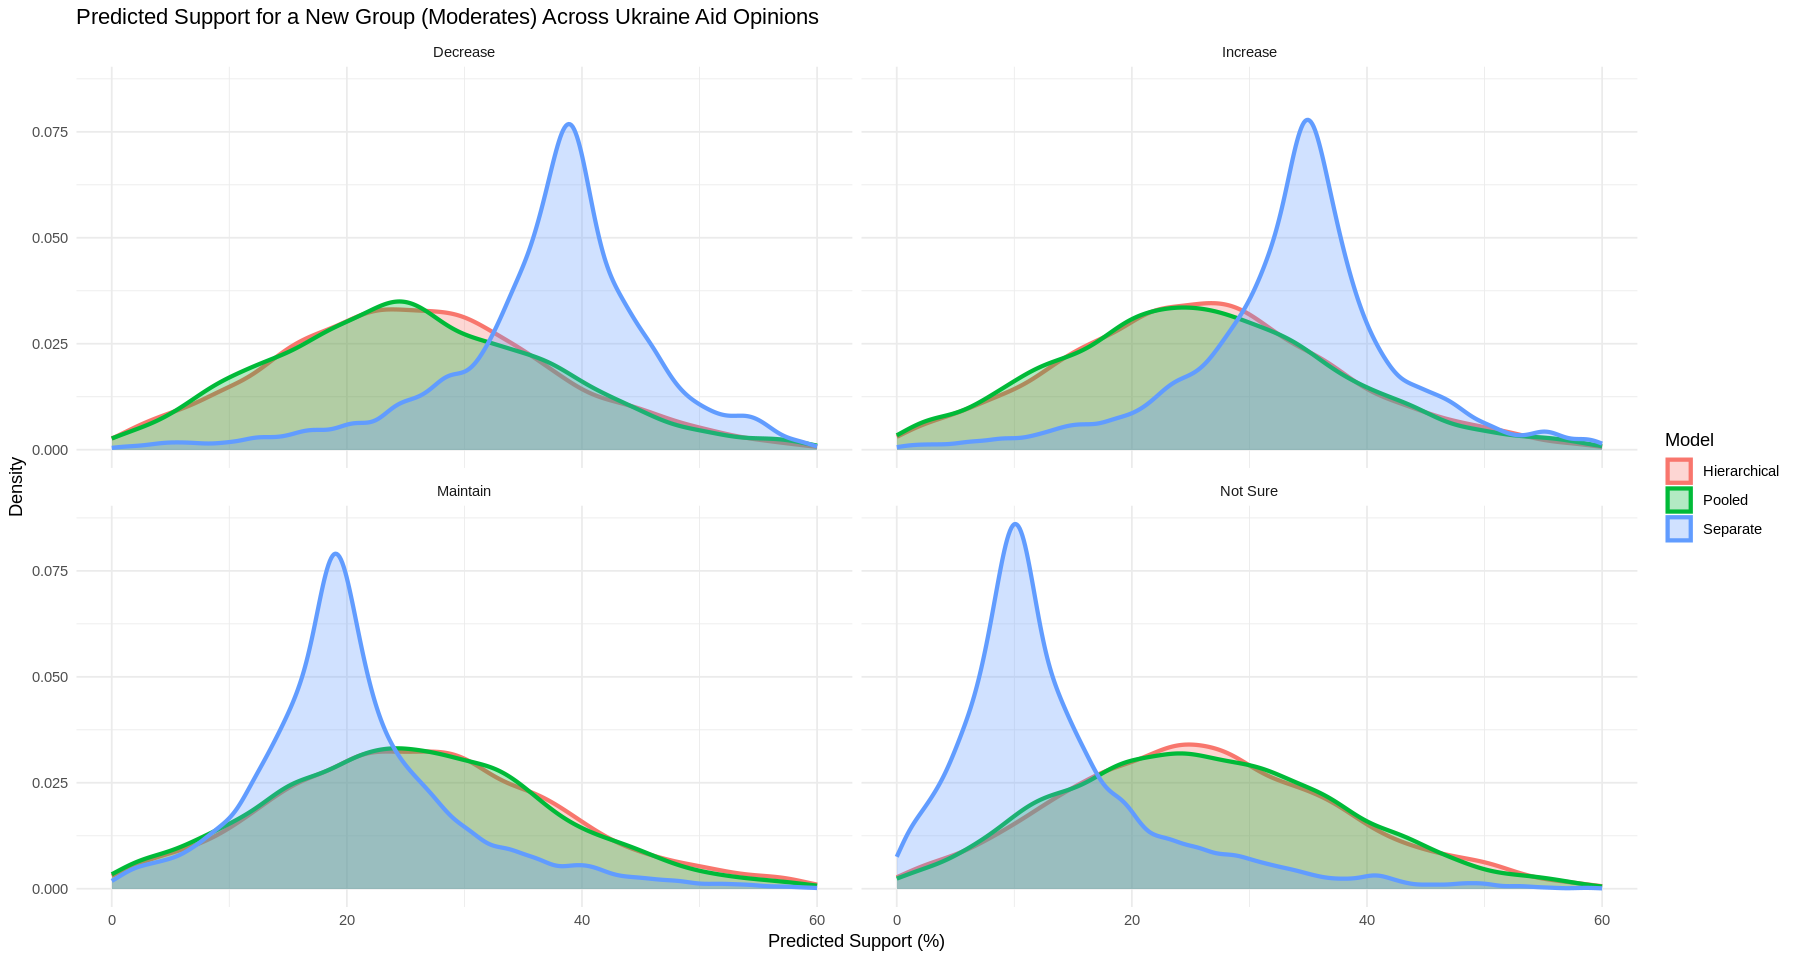

In [8]:
#Part2 - Predictive distribution

post_pool <- rstan::extract(fit_pooled)
post_sep  <- rstan::extract(fit_separate)
post_hier <- rstan::extract(fit_hier)

opinions <- c("Increase", "Maintain", "Not Sure", "Decrease")

simulate_preds <- function(model, opinion_index) {
    n_samples <- length(post_pool$sigma)

    # 1. Pooled model prediction
    y_pooled <- rnorm(n_samples, mean = post_pool$theta, sd = post_pool$sigma)

    # 2. Separate model prediction
    y_separate <- rnorm(n_samples,
                        mean = post_sep$theta[, opinion_index],
                        sd = post_sep$sigma)

    # 3. Hierarchical model prediction
    theta_new <- rnorm(n_samples, mean = post_hier$mu, sd = post_hier$tau)
    y_hierarchical <- rnorm(n_samples, mean = theta_new, sd = post_hier$sigma)

    # Return as tibble
    tibble(
      Pooled = y_pooled,
      Separate = y_separate,
      Hierarchical = y_hierarchical,
      Opinion = opinions[opinion_index]
    )
  }

# Apply simulation across all 4 opinions
moderate_preds_all <- map_dfr(1:4, ~simulate_preds("Moderates", .x)) %>%
  pivot_longer(cols = c(Pooled, Separate, Hierarchical),names_to = "Model", values_to = "PredictedSupport")

#plot
ggplot(moderate_preds_all, aes(x = PredictedSupport, fill = Model, color = Model)) +
  geom_density(alpha = 0.3, linewidth = 1.2) +
  facet_wrap(~Opinion, ncol = 2) +
  labs(
    title = "Predicted Support for a New Group (Moderates) Across Ukraine Aid Opinions",
    x = "Predicted Support (%)",
    y = "Density"
  ) +
  theme_minimal() +
  xlim(0, 60)


**Interpretation of Graph/Results:**

Below are the observations made from the graph:

1. Separate Model:
* The distribution presented by the separate model is narrow and sharply peaked.

* This indicates that it makes precise predictions for each group independently, without using information from other groups.

* The narrow spread means it has low uncertainty for that group, but this can be misleading — if the sample size is small, this model might overfit and give overconfident predictions.

2. Hierarchical and Pooled Models
* The distributions of the hierarchical and pooled models are broader and often overlap.

* This broader spread reflects greater uncertainty or a wider range of plausible values, especially since these models share information across groups.

* The pooled model assumes all groups are the same, so it smooths everything to a common value, ignoring group differences.

* The hierarchical model finds a balance — it allows for group differences but still pulls extreme estimates toward a shared average.

We will try to understand the mean, upper and lower bound values for different aids for the hypothetical group - Moderates.

**1. Increase Aid:**


In [9]:
#Increase Aid prediction distribution
inc_result<-moderate_preds_all %>%
  filter(Opinion == "Increase") %>%
  group_by(Model) %>%
  summarise(
    Median = median(PredictedSupport),
    Mean = mean(PredictedSupport),
    Lower = quantile(PredictedSupport, 0.025),
    Upper = quantile(PredictedSupport, 0.975),
    .groups = "drop"
  )
print(inc_result)

# A tibble: 3 × 5
  Model        Median  Mean Lower Upper
  <chr>         <dbl> <dbl> <dbl> <dbl>
1 Hierarchical   25.2  25.0 -1.49  51.6
2 Pooled         24.7  24.8 -1.93  52.1
3 Separate       34.6  33.9 10.1   56.1


Interpretation of Results for Increase Aid:
* The Median value indicates the expected support
* Lower and Upper Values indicate that we are 95% confident that the actual values lies in this range.

A. Separate Model - As per this model, excepted support is 34% while the actual value lies in the range of 9% to 56%.

B. Pooled Model - As per this model, excepted support is 24% while the actual value lies in the range of 0% to 50%.

C. Hierarchical Model - As per this model, excepted support is 25% while the actual value lies in the range of 0% to 54%.


**2. Maintain Aid:**

In [13]:
# Maintain pred dist
main_result<-moderate_preds_all %>%
  filter(Opinion == "Maintain") %>%
  group_by(Model) %>%
  summarise(
    Median = median(PredictedSupport),
    Mean = mean(PredictedSupport),
    Lower = quantile(PredictedSupport, 0.025),
    Upper = quantile(PredictedSupport, 0.975),
    .groups = "drop"
  )
print(main_result)

# A tibble: 3 × 5
  Model        Median  Mean Lower Upper
  <chr>         <dbl> <dbl> <dbl> <dbl>
1 Hierarchical   25.1  25.2 -2.31  52.3
2 Pooled         24.9  24.8 -3.16  51.5
3 Separate       19.1  19.7 -1.88  44.1


Interpretation of Results:

A. Separate Model - As per this model, excepted support is 19% while the actual value lies in the range of 0% to 44%.

B. Pooled Model - As per this model, excepted support is 25% while the actual value lies in the range of 0% to 51%.

C. Hierarchical Model - As per this model, excepted support is 25% while the actual value lies in the range of 0% to 52%.

**3. Not Sure:**


In [14]:
# Not Sure pred dist
ns_result<-moderate_preds_all %>%
  filter(Opinion == "Not Sure") %>%
  group_by(Model) %>%
  summarise(
    Median = median(PredictedSupport),
    Mean = mean(PredictedSupport),
    Lower = quantile(PredictedSupport, 0.025),
    Upper = quantile(PredictedSupport, 0.975),
    .groups = "drop"
  )
print(ns_result)

# A tibble: 3 × 5
  Model        Median  Mean Lower Upper
  <chr>         <dbl> <dbl> <dbl> <dbl>
1 Hierarchical   24.9  25.2 -1.97  51.5
2 Pooled         25.0  25.0 -1.57  52.8
3 Separate       10.7  11.7 -9.61  37.1


Interpretation of Results:

A. Separate Model - As per this model, excepted support is 10% while the actual value lies in the range of 0% to 37%.

B. Pooled Model - As per this model, excepted support is 25% while the actual value lies in the range of 0% to 53%.

C. Hierarchical Model - As per this model, excepted support is 25% while the actual value lies in the range of 0% to 51%.

**4. Decrease Aid:**

In [15]:
# Decrease pred dist
dc_result<-moderate_preds_all %>%
  filter(Opinion == "Decrease") %>%
  group_by(Model) %>%
  summarise(
    Median = median(PredictedSupport),
    Mean = mean(PredictedSupport),
    Lower = quantile(PredictedSupport, 0.025),
    Upper = quantile(PredictedSupport, 0.975),
    .groups = "drop"
  )
print(dc_result)

# A tibble: 3 × 5
  Model        Median  Mean Lower Upper
  <chr>         <dbl> <dbl> <dbl> <dbl>
1 Hierarchical   25.3  25.3 -1.48  52.3
2 Pooled         25.0  24.9 -2.31  51.1
3 Separate       38.1  37.3 12.4   60.3


Interpretation of Results:

A. Separate Model - As per this model, excepted support is 38% while the actual value lies in the range of 12% to 60%.

B. Pooled Model - As per this model, excepted support is 25% while the actual value lies in the range of 0% to 51%.

C. Hierarchical Model - As per this model, excepted support is 25% while the actual value lies in the range of 0% to 52%.

Key takeaways from the distribution of hypothetical group - 'Moderates':

* Based on pooled and hierarchical model, we can conclude that for each of the four aid opinions — increasing, maintaining, decreasing, or being unsure — hovers around 25%. In case of both the models, there is considerable uncertainity with wide credible intervals meaning we can't be highly confident on any value.

* Based on separate model, we can conclude that around 38% support decreasing the aid whereas 34% support increasing the aid. 10% are not sure and 19% are in support of maintaining the aid. This model suggests a possible lean toward reduction in aid.


## 5. Part 3 : The posterior of the mean support for the hypothetical political affiliation.

In the previous part we calculated the distribution of hypothetical political affilication - 'Moderates'. In this part we are trying to understand what their true average support for 4 Ukraine aid will be with their credibility intervals. We will try to analyze this using 3 models - separate, pooled and hierarchical.


In [17]:
#part 3

posterior_means_all_models <- function(i) {

  #pooled model
  pooled_mod <- post_pool$theta

  # separate model
  sep_mod <- post_sep$theta[, i]

  # hierarchical model
  hier_mod <- rnorm(length(post_hier$mu), mean = post_hier$mu, sd = post_hier$tau)

  tibble(
    Opinion = opinions[i],

    Pooled_Median = median(pooled_mod),
    Pooled_Lower = quantile(pooled_mod, 0.025),
    Pooled_Upper = quantile(pooled_mod, 0.975),

    Separate_Median = median(sep_mod),
    Separate_Lower = quantile(sep_mod, 0.025),
    Separate_Upper = quantile(sep_mod, 0.975),

    Hierarchical_Median = median(hier_mod),
    Hierarchical_Lower = quantile(hier_mod, 0.025),
    Hierarchical_Upper = quantile(hier_mod, 0.975)
  )
}

posterior_summary <- map_dfr(1:4, posterior_means_all_models)

print(as.data.frame(posterior_summary,n = Inf))


   Opinion Pooled_Median Pooled_Lower Pooled_Upper Separate_Median
1 Increase      25.14564     18.11598     32.17695        34.49750
2 Maintain      25.14564     18.11598     32.17695        19.20820
3 Not Sure      25.14564     18.11598     32.17695        10.80271
4 Decrease      25.14564     18.11598     32.17695        38.41540
  Separate_Lower Separate_Upper Hierarchical_Median Hierarchical_Lower
1      16.970149       48.42575            25.13847           6.213381
2       5.370853       35.41552            25.28259           5.781776
3      -1.452936       30.30329            25.21076           6.934179
4      19.728509       50.32484            25.04382           6.213968
  Hierarchical_Upper
1           42.78401
2           44.16522
3           44.18910
4           43.92939


# A tibble: 12 × 5
   Opinion  Model        Median Lower Upper
   <fct>    <fct>         <dbl> <dbl> <dbl>
 1 Increase Pooled         25.1 18.1   32.2
 2 Increase Separate       34.5 17.0   48.4
 3 Increase Hierarchical   25.1  5.57  44.1
 4 Maintain Pooled         25.1 18.1   32.2
 5 Maintain Separate       19.2  5.37  35.4
 6 Maintain Hierarchical   25.2  7.06  42.8
 7 Not Sure Pooled         25.1 18.1   32.2
 8 Not Sure Separate       10.8 -1.45  30.3
 9 Not Sure Hierarchical   25.0  6.20  42.3
10 Decrease Pooled         25.1 18.1   32.2
11 Decrease Separate       38.4 19.7   50.3
12 Decrease Hierarchical   25.4  6.62  43.8


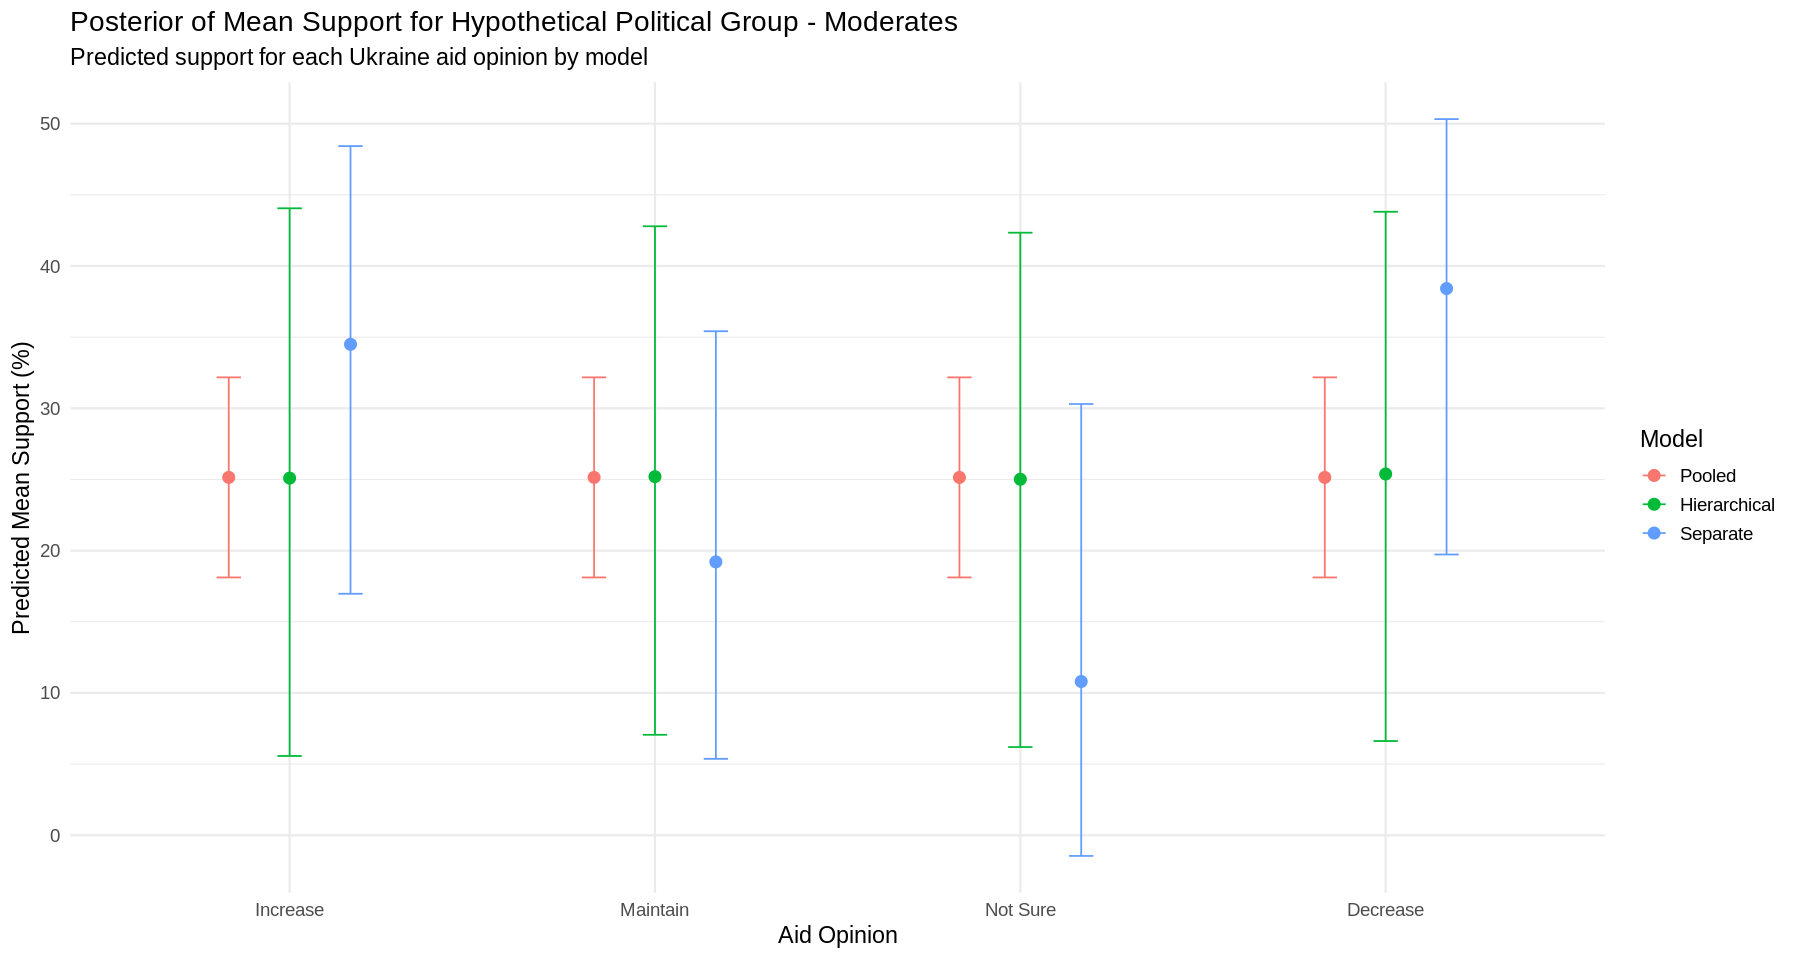

In [11]:
posterior_plot_data <- posterior_summary %>%
  select(Opinion,
         Pooled_Median, Pooled_Lower, Pooled_Upper,
         Separate_Median, Separate_Lower, Separate_Upper,
         Hierarchical_Median, Hierarchical_Lower, Hierarchical_Upper) %>%
  pivot_longer(cols = -Opinion,
               names_to = c("Model", ".value"),
               names_pattern = "(.*)_(.*)")

posterior_plot_data <- posterior_plot_data %>%
  mutate(Opinion = factor(Opinion, levels = c("Increase", "Maintain", "Not Sure", "Decrease")),
         Model = factor(Model, levels = c("Pooled", "Hierarchical", "Separate")))

print(posterior_plot_data)

# Plot
ggplot(posterior_plot_data, aes(x = Opinion, y = Median, color = Model)) +
  geom_point(position = position_dodge(width = 0.5), size = 3) +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), position = position_dodge(width = 0.5), width = 0.2) +
  labs(title = "Posterior of Mean Support for Hypothetical Political Group - Moderates",
       subtitle = "Predicted support for each Ukraine aid opinion by model",
       y = "Predicted Mean Support (%)",
       x = "Aid Opinion",
       color = "Model") +
  theme_minimal(base_size = 14)


Interpretation of Result:

The data in the table shows the estimated average level of support among Moderates for each aid opinion, based on three different models. It reflects what we believe the group’s true average opinion is.

Below is the summary of 3 models based on 4 opinion:

1. Increase Aid

* Pooled and Hierarchical models both estimate around 25% support, with moderate uncertainty.

* Separate model suggests higher support (34%), but it may be less reliable for new groups.

2. Maintain Aid

* Pooled and Hierarchical again estimate ~25%.

* Separate predicts lower support of 19%, suggesting less interest in maintaining the status quo.

3. Not Sure

* Pooled and Hierarchical: again ~25%.

* Separate drops sharply to 11%, showing fewer unsure responses.

4. Decrease Aid

* Pooled and Hierarchical remain around 25%.

* Separate predicts the highest support of 38% for cutting aid.



## **6. Summary**

The survey conducted by Economist and YouGov regarding the opinion of 3 political affiliation on the aids given to Ukraine gives us an understand what the larger public might think. We are trying to gorge their inclination to various options of - increasing aid, maintaining aid, decreasing aid or not sure, through 3 different models - separate, pooled and hierarchical. We tried to analyse the given data and draw insights for below 3 parts:
1. The posterior distribution of the mean support for each political affiliation (Democrats, Independents, Republicans) across the four aid opinions (Increase Aid, Maintain Aid, Not Sure, Decrease Aid).

2. The predictive distribution for a hypothetical additional political affiliation.

3. The posterior of the mean support for the hypothetical political affiliation.

Below is the summary of our findings -

**1. The posterior distribution of the mean support for each political affiliation (Democrats, Independents, Republicans) across the four aid opinions (Increase Aid, Maintain Aid, Not Sure, Decrease Aid).**

The posterior distributions provide a more nuanced, probabilistic understanding of public opinion by accounting for uncertainty in the estimates. They highlight how attitudes toward foreign aid are shaped by political affiliation, with distinct trends and degrees of uncertainty across groups and opinion categories.

* Democrats are clearly more supportive of increasing and maintaining the aid with low support for decreasing the aid. Their level of support for Not Sure is comparatively low.
* Independents are evenly distributed across all 4 opinions with notable level of uncertainity.
* Republicans are mostly opposed. They show high level of support for decreasing aid and lowest for increasing. They are also showing higher level of uncertainity in their distribution.


**2. The predictive distribution for a hypothetical additional political affiliation.**

The predictive distribution for a hypothetical new political affiliation—one not present in the original data—offers valuable insight. This predictive distribution reflects the overall patterns learned from the data while incorporating the uncertainty associated with not having direct observations. The result provides with plausible range of support that this hypothetical group might express across the four opinion of foreign aid (Increase, Maintain, Not Sure, Decrease).

We considered a hypothetical political affiliation - 'Moderates' and below are the conclusions drawn from the distribution -
* The separate model gives us a narrow distribution with high peaks and low level of uncertainity.
* The hierarchical and pooled models have their distribution wide spread indicating high level of uncertaninity.
* Based on the prediction by separate model, the Moderates show 38% support in decreasing aid and 34% support in increasing aid. They show less interest in maintaining and not sure opinion with 19% and 10% respectively.
* Based on the prediction of pooled and hierarchical models, both model show an average of 25% interest in all the 4 opinions - increase, decrease, maintain and  not sure. This suggests that Moderates are likely to have diverse and mixed views on military aid, with no single opinion dominating.

**3. The posterior of the mean support for the hypothetical political affiliation.**

This analysis gives us the estimated average level of support the hypothetical group - Moderates would have for each Ukraine aid opinion, based on the observed data from known groups - Democrats, Independents, Republicans and the modeling approach used.

Below is the summary of our findings:
* The average support prediction for Moderates is same as part 2 for different opinions - Increase, Decrease, Maintain and Not Sure.
* The only difference lies in the credibility interval. This model gives a more precise estimate on the true value range.
* The pooled and hierarchical model predict an average of 25% support for all the opinions with a large room for uncertainity.
* The separate model gives a more precise estimate for average support:
   Increase Aid - 34%
   Decrease Aid - 38%
   Maintain Aid - 19%
   Not Sure     - 10%




Among the models used, the hierarchical model proved to be the most effective and reliable for estimating the posterior mean support for existing data and predicting distribution and average support for a new group. By drawing on the overall trends in the data while still allowing for group-level variation, it produced balanced estimates across all four aid opinions—Increase Aid, Maintain Aid, Not Sure, and Decrease Aid—with moderate uncertainty. The hierarchical approach provided the most nuanced and realistic projection.

## **7. Model Conclusion:**
This report analyzed American public opinion on military aid to Ukraine by applying statistical models to survey data segmented by political affiliation. Using separate, pooled, and hierarchical Gaussian models, we examined patterns of support across Democrats, Independents, and Republicans, and extended these findings to predict the views of a hypothetical political group—Moderates.

The survey provides us with small data but inferences from small samples are still useful but must be interpreted with care. Policymakers and analysts should treat model-based predictions—especially for hypothetical or emerging groups—as indicative rather than definitive, and always consider the range of uncertainty presented in the analysis.

From a policy and analytical standpoint, the hierarchical model offers the most valuable insights. Unlike the pooled model, which assumes all groups are alike, or the separate model, which treats each group in isolation, the hierarchical approach strikes a balance—accounting for shared trends while preserving group-specific variation. This makes it particularly effective for estimating support levels among emerging or less defined political affiliations.

The model's predictions suggest that Moderates are likely to have a balanced and diverse set of views, with no strong consensus around any one aid position—whether increasing, maintaining, or decreasing military support to Ukraine. This finding carries important implications for policy framing and public engagement.

For analysts and decision-makers, this modeling approach demonstrates how limited but well-structured data can be extended to make informed predictions about unobserved groups. As debates over foreign aid continue, such methods can guide more targeted communication strategies and more inclusive policy development.



## **8. References:**

1. https://today.yougov.com/politics/articles/48132-what-americans-think-ukraine-aid

2. https://medium.com/data-science/introduction-to-hierarchical-modeling-a5c7b2ebb1ca

3. https://www.bayesrulesbook.com/chapter-1#thinking-like-a-bayesian

4. https://mc-stan.org/

5. https://nicholasrjenkins.science/tutorials/bayesian-inference-with-stan/mm_stan/

6. https://www.r-bloggers.com/2019/01/an-introduction-to-stan-with-r/
